In [1]:
import pandas as pd

from settings import key
from datetime import datetime


In [2]:
coords = []

with open("server.log", "r") as f:
    while line := f.readline():
        if '/api/v1/forecast/cities?lat=' in line:
            coords.append([
                str(float(line.split("=")[1].split("&")[0])), # lat
                str(float(line.split("=")[2].split("&")[0].split(" ")[0])), # lon
                datetime.strptime(line.split(",")[0][1:], '%Y-%m-%d %H:%M:%S'), # time
            ])


In [3]:
df = pd.DataFrame(coords)


In [4]:
df

,0,1,2
0,56.99167,24.30306,2024-10-30 21:22:50
1,56.99167,24.30306,2024-10-30 21:22:53
2,56.99167,24.30306,2024-10-30 21:22:54
3,56.99167,24.30306,2024-10-30 21:22:55
4,56.99167,24.30306,2024-10-30 21:22:55
...,...,...,...
14990,56.9549560546875,24.18711280822754,2024-11-09 10:08:48
14991,56.9549560546875,24.18711280822754,2024-11-09 10:08:48
14992,56.9549560546875,24.18711280822754,2024-11-09 10:08:48
14993,56.9549560546875,24.18711280822754,2024-11-09 10:08:48


In [5]:
df.columns

RangeIndex(start=0, stop=3, step=1)

In [6]:
df["date_h"] = df[2].apply(lambda r: r.strftime("%Y-%m-%d %H"))

In [7]:
df

,0,1,2,date_h
0,56.99167,24.30306,2024-10-30 21:22:50,2024-10-30 21
1,56.99167,24.30306,2024-10-30 21:22:53,2024-10-30 21
2,56.99167,24.30306,2024-10-30 21:22:54,2024-10-30 21
3,56.99167,24.30306,2024-10-30 21:22:55,2024-10-30 21
4,56.99167,24.30306,2024-10-30 21:22:55,2024-10-30 21
...,...,...,...,...
14990,56.9549560546875,24.18711280822754,2024-11-09 10:08:48,2024-11-09 10
14991,56.9549560546875,24.18711280822754,2024-11-09 10:08:48,2024-11-09 10
14992,56.9549560546875,24.18711280822754,2024-11-09 10:08:48,2024-11-09 10
14993,56.9549560546875,24.18711280822754,2024-11-09 10:08:48,2024-11-09 10


In [8]:
df_h = pd.DataFrame(df.groupby("date_h").count()[1]/3)

<Axes: xlabel='date_h'>

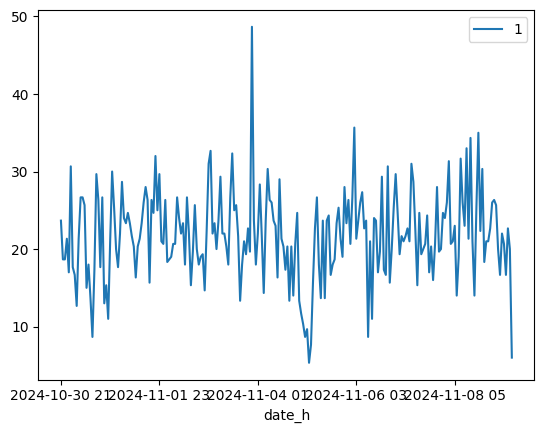

In [9]:
df_h.plot()

In [10]:
from sklearn import linear_model


In [11]:
reg = linear_model.LinearRegression()


In [12]:
import numpy as np


In [13]:
df_h_vals = df_h[1].values.reshape(-1, 1)
df_h_ct = np.array(range(len(df_h_vals))).reshape(-1, 1)


In [14]:
reg.fit(df_h_ct, df_h_vals)


LinearRegression()

In [15]:
import matplotlib.pyplot as plt


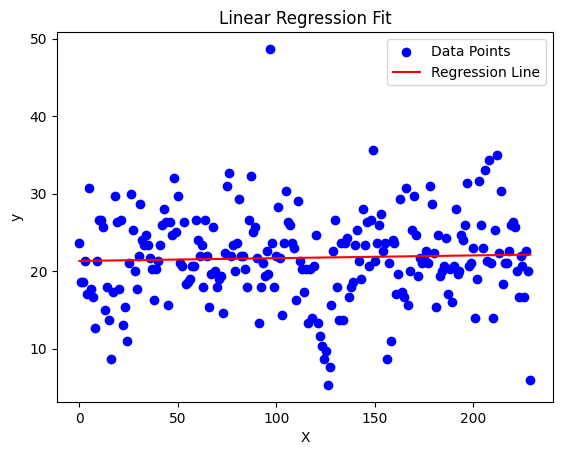

In [16]:
y_pred = reg.predict(df_h_ct)
plt.scatter(df_h_ct, df_h_vals, color='blue', label='Data Points')
plt.plot(df_h_ct, y_pred, color='red', label='Regression Line')

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression Fit")

plt.show()

In [17]:
y_pred

array([[21.32618107],
       [21.32972432],
       [21.33326758],
       [21.33681084],
       [21.3403541 ],
       [21.34389735],
       [21.34744061],
       [21.35098387],
       [21.35452713],
       [21.35807038],
       [21.36161364],
       [21.3651569 ],
       [21.36870016],
       [21.37224341],
       [21.37578667],
       [21.37932993],
       [21.38287319],
       [21.38641644],
       [21.3899597 ],
       [21.39350296],
       [21.39704622],
       [21.40058947],
       [21.40413273],
       [21.40767599],
       [21.41121925],
       [21.4147625 ],
       [21.41830576],
       [21.42184902],
       [21.42539228],
       [21.42893554],
       [21.43247879],
       [21.43602205],
       [21.43956531],
       [21.44310857],
       [21.44665182],
       [21.45019508],
       [21.45373834],
       [21.4572816 ],
       [21.46082485],
       [21.46436811],
       [21.46791137],
       [21.47145463],
       [21.47499788],
       [21.47854114],
       [21.4820844 ],
       [21